In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import seaborn as sns
import random
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.patches as patches
import matplotlib
matplotlib.use('Agg')
from matplotlib import gridspec
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager as font_manager
import copy 
font_dirs = ['/project/elkabetz_lab_data/tools/PythonFonts/', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
matplotlib.rcParams['font.family'] = 'arial'
%matplotlib inline

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


In [2]:
# Load Kriegstein datasets
adata = sc.read_text("/project/elkabetz_lab_data/public_data/kriegstein_2020/oragnoid_scrna/exprMatrix.tsv.gz")
adata = adata.transpose()
meta = pd.read_csv("/project/elkabetz_lab_data/public_data/kriegstein_2020/oragnoid_scrna/meta.tsv", sep="\t")
adata.obs = meta
adata = adata[adata.obs['Age'].isin([8,10])]

genes = list(adata.var_names)
sc.pp.highly_variable_genes(adata,n_bins=50)
min_mean = 0.0125
top_2000 = sorted(adata.var['dispersions_norm'][adata.var['means'] >= min_mean],reverse=True)[2000]
adata.var['highly_variable'] = (adata.var['dispersions_norm'] >= top_2000) & (adata.var['means'] >= min_mean)
adata.var[adata.var['highly_variable'] == True].sort_values(['dispersions_norm'],ascending=False)[0:50]


/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
Trying to set attribute `.var` of view, copying.
/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,highly_variable,means,dispersions,dispersions_norm
CTD-2521M24.8,True,0.340872,6.715139,19.466492
POU3F4,True,0.205965,5.154947,16.556498
PMCH,True,0.315193,5.872487,15.901799
ATM,True,0.206002,4.582891,13.472125
CRYAB,True,0.476960,4.912658,13.150361
SST,True,0.164137,4.494603,12.996101
KSR2,True,0.084603,6.799348,12.570626
MROH8,True,0.401571,4.541483,12.219095
CNNM1,True,0.058661,6.308493,11.290496
NTS,True,0.452827,4.352443,11.266603


In [3]:
# Load organoid data
adata_dict = {}
line_ = 'FOK1'
adata_dict[line_] = {}
for tx in ['sbnx','sbn']:
    print('loading: ',tx)
    pkl_file = open('/project/elkabetz_lab_data/sequencing/scrna/d50_organoids_exp3/analysis/data/'+line_+'/d50_'+tx+'.pkl', 'rb')
    adata_dict[line_][tx] = pkl.load(pkl_file)
    adata_dict[line_][tx].obs['line'] = [line_ for x in range(len(adata_dict[line_][tx].obs))]
    pkl_file.close()

line_ = 'KUCG2'
adata_dict[line_] = {}
for tx in ['sbnx','sbn']:
    print('loading: ',tx)
    pkl_file = open('/project/elkabetz_lab_data/sequencing/scrna/d50_organoids_exp3/analysis/data/'+line_+'/d50_'+tx+'.pkl', 'rb')
    adata_dict[line_][tx] = pkl.load(pkl_file)
    adata_dict[line_][tx].obs['line'] = [line_ for x in range(len(adata_dict[line_][tx].obs))]
    pkl_file.close()

line_ = 'zip13k5'
adata_dict[line_] = {}
for tx in ['sbnx','sbn','nt']:
    print('loading: ',tx)
    pkl_file = open('/project/elkabetz_lab_data/sequencing/scrna/d50_organoids_exp2/analysis/data/'+line_+'/d50_'+tx+'.pkl', 'rb')
    adata_dict[line_][tx] = pkl.load(pkl_file)
    adata_dict[line_][tx].obs['line'] = ['zip13k5' for x in range(len(adata_dict[line_][tx].obs))]
    pkl_file.close()

line_ = 'zip8k8'
adata_dict[line_] = {}
for tx in ['sbnx','sbn','nt']:
    print('loading: ',tx)
    pkl_file = open('/project/elkabetz_lab_data/sequencing/scrna/d50_organoids_exp2/analysis/data/'+line_+'/d50_'+tx+'.pkl', 'rb')
    adata_dict[line_][tx] = pkl.load(pkl_file)
    adata_dict[line_][tx].obs['line'] = ['zip8k8' for x in range(len(adata_dict[line_][tx].obs))]
    pkl_file.close()

adata_merged = adata_dict['zip13k5']['sbnx'].concatenate(adata_dict['zip13k5']['sbn'],adata_dict['zip13k5']['nt'],
    adata_dict['zip8k8']['sbnx'],adata_dict['zip8k8']['sbn'],adata_dict['zip8k8']['nt'],adata_dict['FOK1']['sbnx'],
    adata_dict['FOK1']['sbn'],adata_dict['KUCG2']['sbnx'],adata_dict['KUCG2']['sbn'])


loading:  sbnx
loading:  sbn
loading:  sbnx
loading:  sbn
loading:  sbnx
loading:  sbn
loading:  nt
loading:  sbnx
loading:  sbn
loading:  nt


In [4]:

genes = list(adata_merged.var_names)
mito_genes = [gene for gene in genes if gene[:3] == 'MT-' or (gene[:2] == 'MT' and '.' in gene)]
rb_genes = [gene for gene in genes if gene[:3] in ['RNR','RPL','RPS','MRP'] or (gene[:2] == 'RP' and '.' in gene)]
adata_merged.obs['n_counts'] = adata_merged.X.sum(axis=1)
y=adata_merged.X > 0
adata_merged.obs['n_genes'] = y.sum(axis=1)
adata_merged.obs['percent_mito'] = np.sum(adata_merged[:, mito_genes].X, axis=1) / np.sum(adata_merged.X, axis=1)
adata_merged.obs['percent_ribo'] = np.sum(adata_merged[:, rb_genes].X, axis=1) / np.sum(adata_merged.X, axis=1)
print('n cells before filter:',len(adata_merged.obs['n_counts']))
sub_cells = adata_merged.obs[(adata_merged.obs['n_counts'] < 10000) & (adata_merged.obs['percent_mito'] < 0.4)]
print('n cells after filter:',len(sub_cells))
adata_merged = adata_merged[sub_cells.index,:]
adata_merged.obs['Index'] = range(len(adata_merged.obs))

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


n cells before filter: 96484
n cells after filter: 96454


In [5]:
info = pd.read_csv('/project/elkabetz_lab_data/sequencing/scrna/analysis/merged_d50_10x_v2/data/cell_identity.removed_doublets.tsv',sep='\t')
info.index = info['cell_id']
info = info.drop('cell_id',axis=1)
adata_merged.obs = info.loc[adata_merged.obs.index]

In [6]:
#remove doublets
adata_merged = adata_merged[adata_merged.obs['cell_type'] != 'doublet']
y=np.sum(adata_merged.X,axis=0)
adata_merged = adata_merged[:,y>0]

In [7]:
sc.pp.normalize_total(adata_merged,)#, target_sum=1e6)#, inplace=False)
adata_merged.X = np.log1p(adata_merged.X)

sc.pp.highly_variable_genes(adata_merged,n_bins=50)
min_mean = 0.0125
top_2000 = sorted(adata_merged.var['dispersions_norm'][adata_merged.var['means'] >= min_mean],reverse=True)[2000]
adata_merged.var['highly_variable'] = (adata_merged.var['dispersions_norm'] >= top_2000) & (adata_merged.var['means'] >= min_mean)
adata_merged.var[adata_merged.var['highly_variable'] == True].sort_values(['dispersions_norm'],ascending=False)[0:50]

hvg_org = adata_merged.var[adata_merged.var['highly_variable'] == True].index
hvg_krieg = adata.var[adata.var['highly_variable'] == True].index

merged_hvg = set(hvg_org).union(set(hvg_krieg))
merged_hvg_sub = list(merged_hvg.intersection(set(adata.var.index)).intersection(set(adata_merged.var.index)))
hvg_final_sub = list(set(hvg_krieg).intersection(set(adata.var.index)).intersection(set(adata_merged.var.index)))

adata_org = adata_merged

adata = adata[:,merged_hvg_sub]
adata_org = adata_org[:,merged_hvg_sub]

adata.raw_X = copy.deepcopy(adata.X)

# Normalize Kriegstein organoid data
sc.pp.regress_out(adata,['Batch'])
sc.pp.scale(adata, max_value=10)

# Scale dataset accordingly
sc.pp.scale(adata_org, max_value=10)

adata.obs.index = adata.obs['Cell']
adata.obs = adata.obs.drop(['Cell'],axis=1)

## merge datasets
adata_merge = adata.concatenate(adata_org,batch_key='sample')


/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'orig.ident' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Protocol' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Origin' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Batch' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'iPSC.or.hESC' as catego

In [8]:
len(merged_hvg_sub)

3142

In [9]:
sc.tl.pca(adata_merge)

sc.external.pp.bbknn(adata_merge,batch_key='sample')#,local_connectivity=10)

#sc.pp.neighbors(adata_merge, n_pcs =50)

sc.tl.umap(adata_merge,min_dist=0.1)


tx_dict = {'nt':'Inhibitor-free','sbnx':'Triple-i','sbn':'Dual SMAD-i'}

adata_merge.obs['Protocol'] = [x if x in ['Sasai','Xiang','Pasca'] else tx_dict[adata_merge.obs['tx'][j]] for j,x in enumerate(adata_merge.obs['Protocol'])]
adata_merge.obs['Age'] = [x if x in [3.,5.,8.,10.,15.,24.] else tx_dict[adata_merge.obs['tx'][j]] for j,x in enumerate(adata_merge.obs['Age'])]
adata_merge.obs.astype({'Age':'category','Cluster':'category'}).dtypes

adata_merge.obs['Index'] = range(len(adata_merge.obs))

color_d = {'Sasai':'lightcoral','Xiang':'paleturquoise','Pasca':'lightgreen','Inhibitor-free':'green','Dual SMAD-i':'purple','Triple-i':'gold'}
size_d = {'Sasai':2,'Xiang':2,'Pasca':2,'Inhibitor-free':0.5,'Dual SMAD-i':0.5,'Triple-i':0.5}
alpha_d = {'Sasai':0.5,'Xiang':0.5,'Pasca':0.5,'Inhibitor-free':1,'Dual SMAD-i':1,'Triple-i':1}

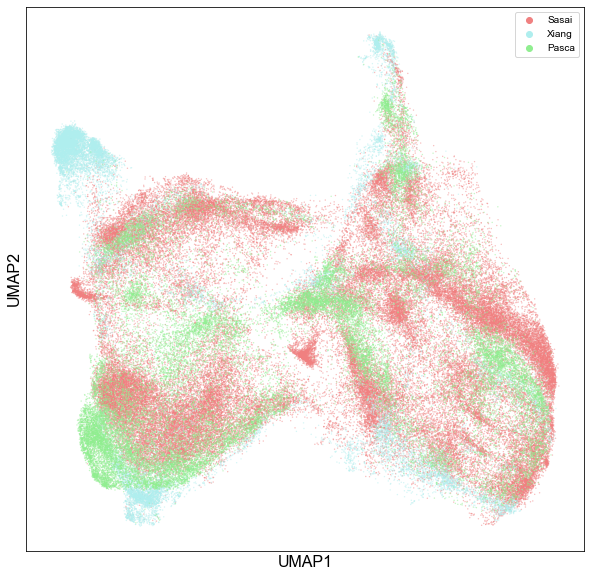

In [10]:
## kriegstein fig
fig = plt.figure(figsize=(10,10))

for tx in ['Sasai','Xiang','Pasca']:
    plt.scatter(x=[x[0] for x in adata_merge.obsm['X_umap'][adata_merge.obs[adata_merge.obs['Protocol']==tx]['Index']]],
        y=[x[1] for x in adata_merge.obsm['X_umap'][adata_merge.obs[adata_merge.obs['Protocol']==tx]['Index']]],
        color=color_d[tx],s=size_d[tx],alpha=alpha_d[tx],ec=None)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

for tx in ['Sasai','Xiang','Pasca']:
    plt.plot(-10000,-10000,'o',label=tx,color=color_d[tx])

plt.xticks([])
plt.yticks([])
plt.xlabel('UMAP1',fontsize=16)
plt.ylabel('UMAP2',fontsize=16)

plt.legend()
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/umap.kriegstein_only.pdf')
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/umap.kriegstein_only.png',dpi=500)
plt.show()

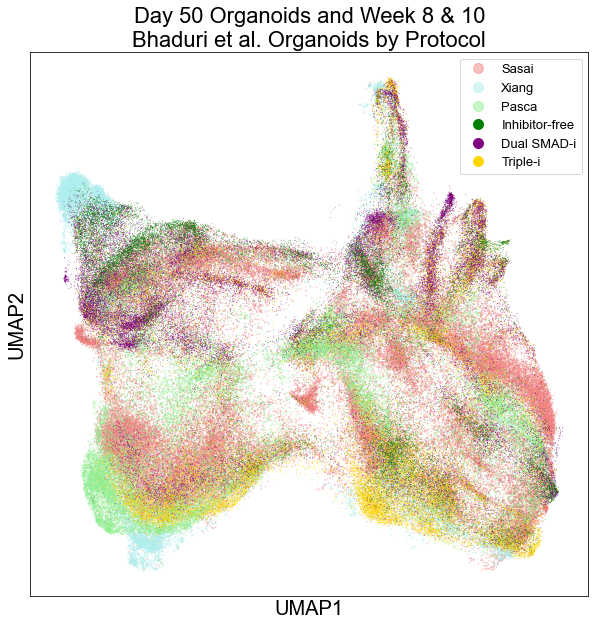

In [11]:
## overall fig
fig = plt.figure(figsize=(10,10))

for tx in ['Sasai','Xiang','Pasca']:
    plt.scatter(x=[x[0] for x in adata_merge.obsm['X_umap'][adata_merge.obs[adata_merge.obs['Protocol']==tx]['Index']]],
        y=[x[1] for x in adata_merge.obsm['X_umap'][adata_merge.obs[adata_merge.obs['Protocol']==tx]['Index']]],
        color=color_d[tx],s=size_d[tx],alpha=alpha_d[tx],ec=None)

xs = adata_merge.obsm['X_umap'][adata_merge.obs['sample']=='1'][:,0]
ys = adata_merge.obsm['X_umap'][adata_merge.obs['sample']=='1'][:,1]
colors = [color_d[tx_dict[tx]] for tx in adata_merge.obs[adata_merge.obs['sample']=='1']['tx']]
idx_list = list(range(len(xs)))
random.shuffle(idx_list)

plt.scatter(x=[xs[i] for i in idx_list],y=[ys[i] for i in idx_list],color=[colors[i] for i in idx_list],s=0.5,alpha=1,ec=None)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

for tx in ['Sasai','Xiang','Pasca']:
    plt.plot(-10000,-10000,'o',label=tx,color=color_d[tx],alpha=alpha_d[tx],markeredgecolor=None,markersize=10)

for tx in ['nt','sbn','sbnx']:
    plt.plot(-10000,-10000,'o',label=tx_dict[tx],color=color_d[tx_dict[tx]],markeredgecolor=None,markersize=10)

plt.xticks([])
plt.yticks([])
plt.xlabel('UMAP1',fontsize=20)
plt.ylabel('UMAP2',fontsize=20)

plt.title('Day 50 Organoids and Week 8 & 10\nBhaduri et al. Organoids by Protocol',fontsize=22)
plt.legend(fontsize=13)
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/umap.kriegstein_merged.pdf')
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/umap.kriegstein_merged.png',dpi=500)
plt.show()

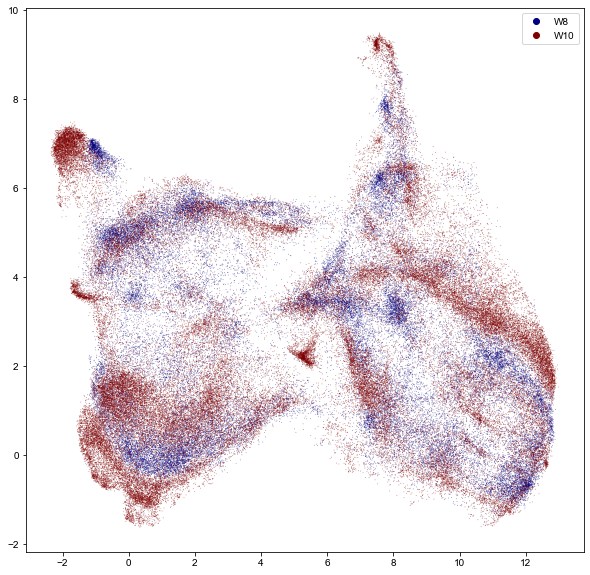

In [12]:
## age
age_color_dict = {3.:'paleturquoise', 5.:'dodgerblue', 8.:'navy', 10.:'maroon', 15.:'tomato', 24.:'lightsalmon'}
fig = plt.figure(figsize=(10,10))

for age in [8.,10.]:
    plt.scatter(x=[x[0] for x in adata_merge.obsm['X_umap'][adata_merge.obs[adata_merge.obs['Age']==age]['Index']]],
        y=[x[1] for x in adata_merge.obsm['X_umap'][adata_merge.obs[adata_merge.obs['Age']==age]['Index']]],
        color=age_color_dict[float(age)],s=0.8,alpha=0.5,ec=None)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

for age in [8.,10.]:
    plt.plot(-10000,-10000,'o',label='W'+str(int(age)),color=age_color_dict[age])

plt.legend()
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/umap.kriegstein.age.pdf')
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/umap.kriegstein.age.png',dpi=500)
plt.show()

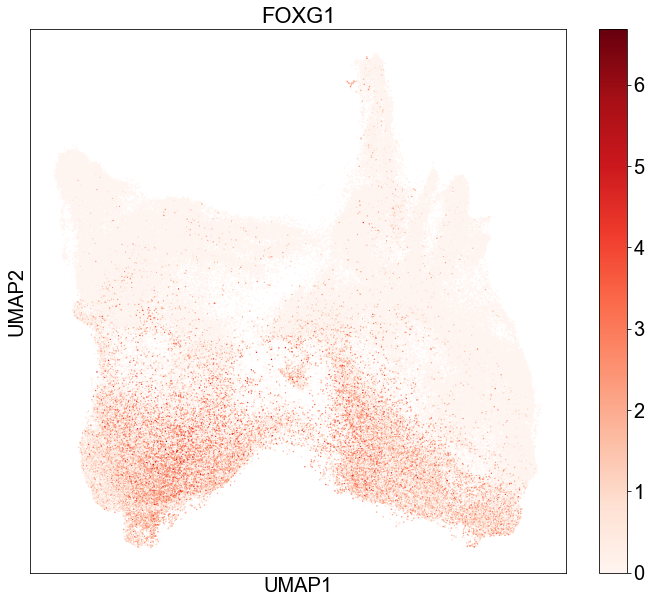

In [13]:
gene='FOXG1'
ax = plt.figure(figsize=(12,10))
vmin = 0
vmax = max(adata_merge.X[:,list(adata_merge.var.index).index(gene)])
colormap = cm.Reds
normalize = Normalize(vmin=vmin, vmax=vmax)
xs = adata_merge.obsm['X_umap'][:,0]
ys = adata_merge.obsm['X_umap'][:,1]
plt.scatter(xs,ys,c=adata_merge.X[:,list(adata_merge.var.index).index(gene)],cmap=colormap,norm=normalize,s=2,ec=None)
plt.xticks([])
plt.yticks([])
plt.xlabel('UMAP1',fontsize=20)
plt.ylabel('UMAP2',fontsize=20)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.title(gene,fontsize=22)
cbar = plt.colorbar()#colormap)
cbar.ax.tick_params(labelsize=20) #Set the font size of the color scale scale.
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/umap_merged.'+gene+'.png',dpi=500)
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/umap_merged.'+gene+'.pdf')

In [14]:
def make_heatmap_zscore(fig,ax,genes_grouped,adata,ordered_clusters,breaks=[],labs=None,groupby='Cluster',xrotation=False,colormap=None,
    vmin=-1.5,vmax=1.5,edgecolor=None):
    
    if colormap is None:
        colormap = cm.bwr
    else:
        colormap=colormap
    normed_cmap = Normalize(vmin=vmin, vmax=vmax)
    ax.yaxis.set_ticks_position('both')
    
    ## calculate zscores per gene per cluster (list ordered by ordered_clusters)
    zscores_per_gene = {}
    for gene,group in genes_grouped:
        if gene in adata.var.index:
            gene_idx = list(adata.var.index).index(gene)
            log_expr_vals_arr = []
            for clust in ordered_clusters:
                log_expr_vals_arr.append(np.mean(adata.raw_X[adata.obs[adata.obs[groupby]==clust]['index'],gene_idx]))
            log_expr_vals_arr = np.array(log_expr_vals_arr)
            mean_vals = np.mean(log_expr_vals_arr)
            std_dev = np.std(log_expr_vals_arr)
            zscores_per_gene[gene] = (log_expr_vals_arr-mean_vals)/std_dev
        else:
            zscores_per_gene[gene] = np.array([-2]*len(ordered_clusters))
    
    prev_group = genes_grouped[0][1]
    buff = 0
    xbuff = 0
    yticks = []
    region_ticks = []
    region_labs = []
    grp_cnt = 0
    xticks = []
    for j,(gene,group) in enumerate(genes_grouped):
        if group != prev_group: 
            region_ticks.append(-j-buff+(grp_cnt+1)/2.)
            region_labs.append(prev_group)
            buff += 1
            grp_cnt = 0
            prev_group = group
        grp_cnt += 1
        xbuff = 0
        for k,clust in enumerate(ordered_clusters):
            val = zscores_per_gene[gene][k]
            color = tuple(np.array(colormap(normed_cmap(val),bytes=True))/255.)
            if edgecolor is None: edgecol = color
            else: edgecol = edgecolor
            p = patches.Rectangle((k+xbuff-1/2.,-j-1/2.-buff), 1, 1, fill=True, 
                                  facecolor=color, linestyle='-',edgecolor=edgecol)
            ax.add_patch(p)
            xticks.append(j+xbuff)
            if k in breaks:
                xbuff += 1
        yticks.append(-j-buff)
    buff+=1
    region_ticks.append(-j-buff+(grp_cnt+1)/2.)
    region_labs.append(prev_group)
    plt.yticks(yticks,[x[0] for x in genes_grouped],fontsize=12)
    xticks = []
    xbuff = 0
    for x in range(len(ordered_clusters)):
        xticks.append(x+xbuff)
        if x in breaks:
            xbuff+=1
    if labs is None:
        plt.xticks(xticks,['C'+str(x+1) for x in ordered_clusters],fontsize=16)
    else:
        if xrotation == False:
            plt.xticks(xticks,[str(x) for x in labs],fontsize=18)
        else:
            plt.xticks(xticks,[str(x) for x in labs],fontsize=18,rotation=90)
    plt.xlim(-0.5,k+0.5+xbuff)
    plt.ylim(-j+0.5-buff,0.5)
    ax.yaxis.set_ticks_position("left")
    ax2 = ax.twinx()
    plt.yticks(region_ticks,region_labs,fontsize=16)
    plt.ylim(-j+0.5-buff,0.5)
    ax2.yaxis.set_ticks_position("left")
    ax.yaxis.set_ticks_position("right")
    return fig

In [15]:
blacklist_genes = []
reg_and_temp_genes = {}
with open('/project/elkabetz_lab_data/sequencing/scrna/d30_organoids/analysis/data/scRNA_regional_and_temporal_genes.txt','r') as reg_and_temp_genes_fn:
    for i,row in enumerate(reg_and_temp_genes_fn):
        spl = row.strip("\r\n").split("\t")
        if i == 0: 
            continue
        if spl[0] in blacklist_genes: continue
        if spl[-1] not in reg_and_temp_genes:
            reg_and_temp_genes[spl[-1]] = []
        reg_and_temp_genes[spl[-1]].append((spl[0],spl[1]))


tmp_reg = copy.deepcopy(reg_and_temp_genes['Brain Regions Genes'])
for gene in ['MKI67','TOP2A','HMGB2']:
    tmp_reg.insert(7,(gene,'Cycling Genes'))

for gene in ['POU4F1', 'NTRK1', 'NEFL', 'SNCG']:
    tmp_reg.insert(-4,(gene,'PNS'))

for gene in ['MPZ','S100B','SOX10','NGFR','MAG']:
    tmp_reg.insert(-4,(gene,'Schwann Cells'))

for gene in ['LHX1','TP73','RELN']:
    tmp_reg.insert(19,(gene,'Cajal-Retzius Neuron'))

for gene in ['DLX1','DLX2','DLX5']:
    tmp_reg.insert(19,(gene,'Subpallium'))

for gene in ['KRT18', 'KRT8', 'CLDN6', 'CLDN7']:
    tmp_reg.append((gene,'Epithelial'))

for gene in ['COL1A1','COL1A2','DCN','LUM']:
    tmp_reg.append((gene,'Mesoderm'))

for gene in ['DCX','ELAVL2','ELAVL3','TUBB3']:
    tmp_reg.insert(7,(gene,'Neurons'))

tmp_reg_sub = []
for j,reg in enumerate(tmp_reg):
    if reg[0] in ['ECSCR','MAG','SIX3','SP8','NR2F1','RSPO1','LMX1A','FOXJ1','OLIG3','DMBX1','DBX1','EN2','HOXA2','HOXB2',
    'PAX7','PHOX2B','NTRK1','NGFR','VSX2','RAX','VAX2','SIX6','KRT18','KRT8','CLDN6','CLDN7','RELN','TP73','LHX1']: continue
    tmp_reg_sub.append(reg)
    if reg[0] == 'FOXG1':
        tmp_reg_sub.append(('EMX1','Neocortex'))
        tmp_reg_sub.append(('LHX2','Neocortex'))
    if reg[0] == 'WNT7B':
        tmp_reg_sub.append(('TTR','Choroid Plexus'))
        tmp_reg_sub.append(('HTR2C','Choroid Plexus'))


In [16]:
n_cells_per_clust = {}
for clust in set(adata.obs['Cluster']):
    n_cells_per_clust[clust] = sum(adata.obs['Cluster']==clust)
    
for clust,n_cells in sorted(n_cells_per_clust.items(),key = lambda x:x[1]):
    print('Cluster',clust,':',n_cells,'cells, ',round(n_cells/sum(n_cells_per_clust.values()),5)*100,'%')

Cluster 18 : 1 cells,  0.001 %
Cluster 1 : 27 cells,  0.021 %
Cluster 6 : 77 cells,  0.061 %
Cluster 25 : 366 cells,  0.28900000000000003 %
Cluster 28 : 389 cells,  0.307 %
Cluster 30 : 519 cells,  0.41000000000000003 %
Cluster 36 : 556 cells,  0.439 %
Cluster 29 : 596 cells,  0.471 %
Cluster 24 : 655 cells,  0.518 %
Cluster 14 : 703 cells,  0.5559999999999999 %
Cluster 31 : 744 cells,  0.588 %
Cluster 5 : 957 cells,  0.756 %
Cluster 38 : 989 cells,  0.782 %
Cluster 10 : 1395 cells,  1.103 %
Cluster 21 : 1621 cells,  1.281 %
Cluster 40 : 1931 cells,  1.526 %
Cluster 35 : 1940 cells,  1.533 %
Cluster 17 : 2075 cells,  1.6400000000000001 %
Cluster 39 : 2358 cells,  1.864 %
Cluster 3 : 2465 cells,  1.9480000000000002 %
Cluster 12 : 2559 cells,  2.022 %
Cluster 23 : 2855 cells,  2.2560000000000002 %
Cluster 13 : 3064 cells,  2.4219999999999997 %
Cluster 2 : 3091 cells,  2.443 %
Cluster 19 : 3199 cells,  2.528 %
Cluster 9 : 3245 cells,  2.565 %
Cluster 22 : 3375 cells,  2.667 %
Cluster 32 :

In [17]:
# remove clusters 1 and 18 due to very low number of cells (<0.05%)

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


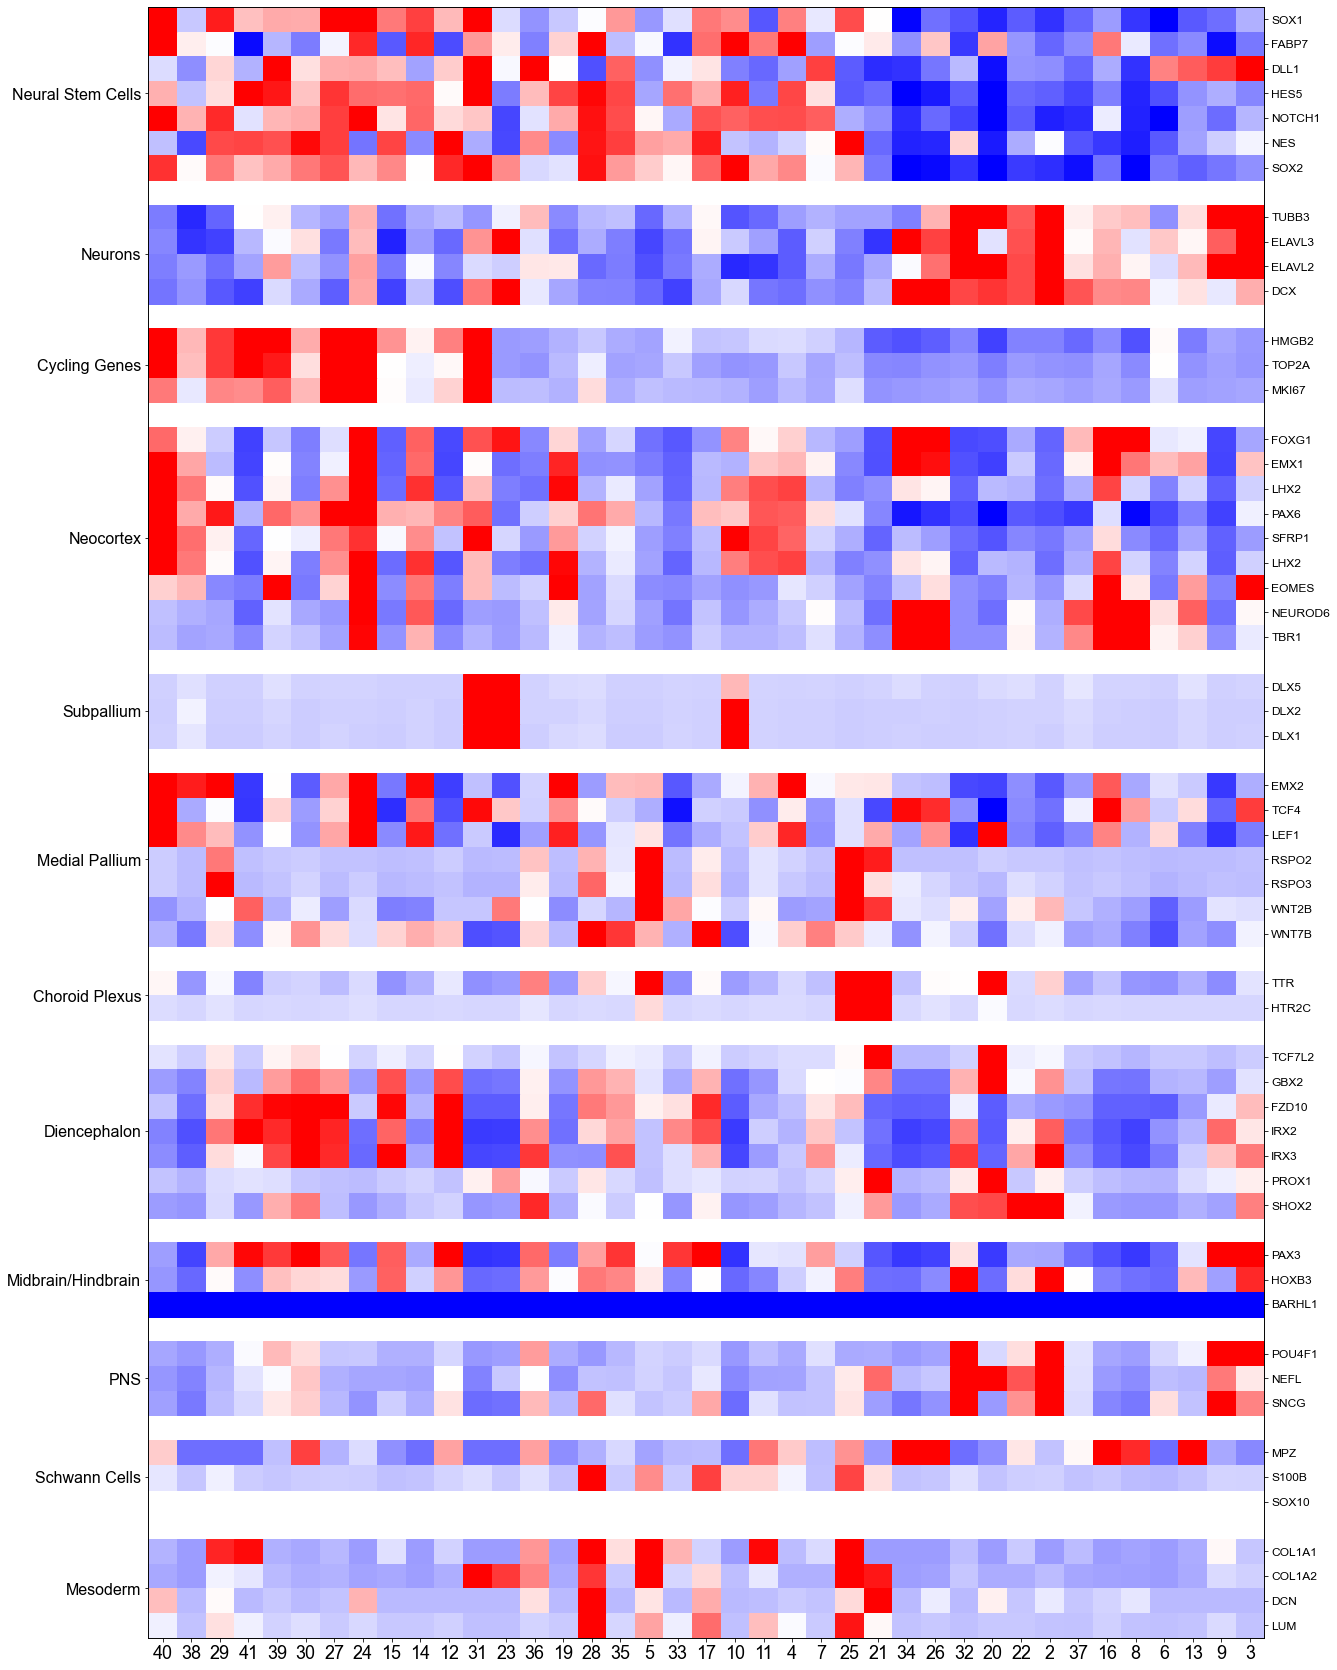

In [18]:
perc_cells_dict = {}
for clust in set(adata.obs['Cluster']):
    perc_cells_dict[clust] = [len(adata.obs[adata.obs['Cluster']==clust])/len(adata.obs),len(adata.obs[adata.obs['Cluster']==clust])]

primary_clust_order_sub = [40,38,29,41,39,30,27,24,15,14,12,31,23,36,19,
                            28,35,5,33,17,10,11,4,7,25,21,34,26,32,20,
                            22,2,37,16,8,6,13,9,3]

adata.obs['index'] = range(len(adata.obs))

fig = plt.figure(figsize=(20,30))
ax = plt.subplot(111)
breaks=[]
fig = make_heatmap_zscore(fig,ax,tmp_reg_sub,adata,primary_clust_order_sub,
                   breaks=breaks,labs = [str(x) for x in primary_clust_order_sub])
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/heatmap_krieg.png',dpi=150)

In [19]:
regional_dict = {40:'Cortical',38:'Cortical',29:'Hippocampal',41:'Posterior',39:'Posterior',30:'Posterior',27:'Posterior',
24:'Cortical',15:'Posterior',14:'Cortical',12:'Posterior',31:'Subpallium',23:'Subpallium',36:'Unknown',19:'Cortical',28:'Hippocampal',
35:'Posterior',5:'Hippocampal',33:'Posterior',17:'Posterior',10:'Subpallium',11:'Cortical',4:'Cortical',7:'Posterior',
25:'Hippocampal',21:'Hippocampal',1:'Non-neural',34:'Cortical',26:'Cortical',32:'Posterior',20:'Posterior',22:'Posterior',
2:'Posterior',37:'Cortical',16:'Cortical',8:'Cortical',6:'Unknown',13:'Cortical',9:'Posterior',3:'Posterior',18:'Unknown'}

adata.obs['region'] = [regional_dict[clust] for clust in adata.obs['Cluster']]

meta2 = pd.read_csv("/project/elkabetz_lab_data/public_data/kriegstein_2020/oragnoid_scrna/cell_info.tsv", sep="\t")
meta2.index = meta2['cell_name']
for field in ['Class','State','Type','Subtype']:
    adata.obs[field] = meta2.loc[adata.obs.index][field]

cell_type_dict_krieg = {}
clust_dict_ref = {}
for clust in set(adata.obs['Cluster']):
    cell_type_dict_krieg[clust] = {}
    cell_types = adata.obs[adata.obs['Cluster']==clust]['Subtype']
    for cell_type in set(cell_types):
        cell_type_dict_krieg[clust][cell_type] = len([x for x in cell_types if x == cell_type])
        clust_dict_ref[clust] = cell_type

sorted_clusts_sub = []
sorted_regs = ['Cortical','Subpallium','Hippocampal','Posterior','Unknown','Non-neural']
for reg in sorted_regs:
    clusts = [x[0] for x in regional_dict.items() if x[1] == reg]
    clusts_rg = [x for x in clusts if 'RG' in clust_dict_ref[x] or 'glia' in clust_dict_ref[x] or 'uality' in clust_dict_ref[x] or 'Unknown' in clust_dict_ref[x]]
    clusts_non_rg = list(set(clusts)-set(clusts_rg))
    sorted_clusts_sub.extend(clusts_rg)
    sorted_clusts_sub.extend(clusts_non_rg)

sorted_clusts_sub = [x for x in sorted_clusts_sub if x not in [1,18]]

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


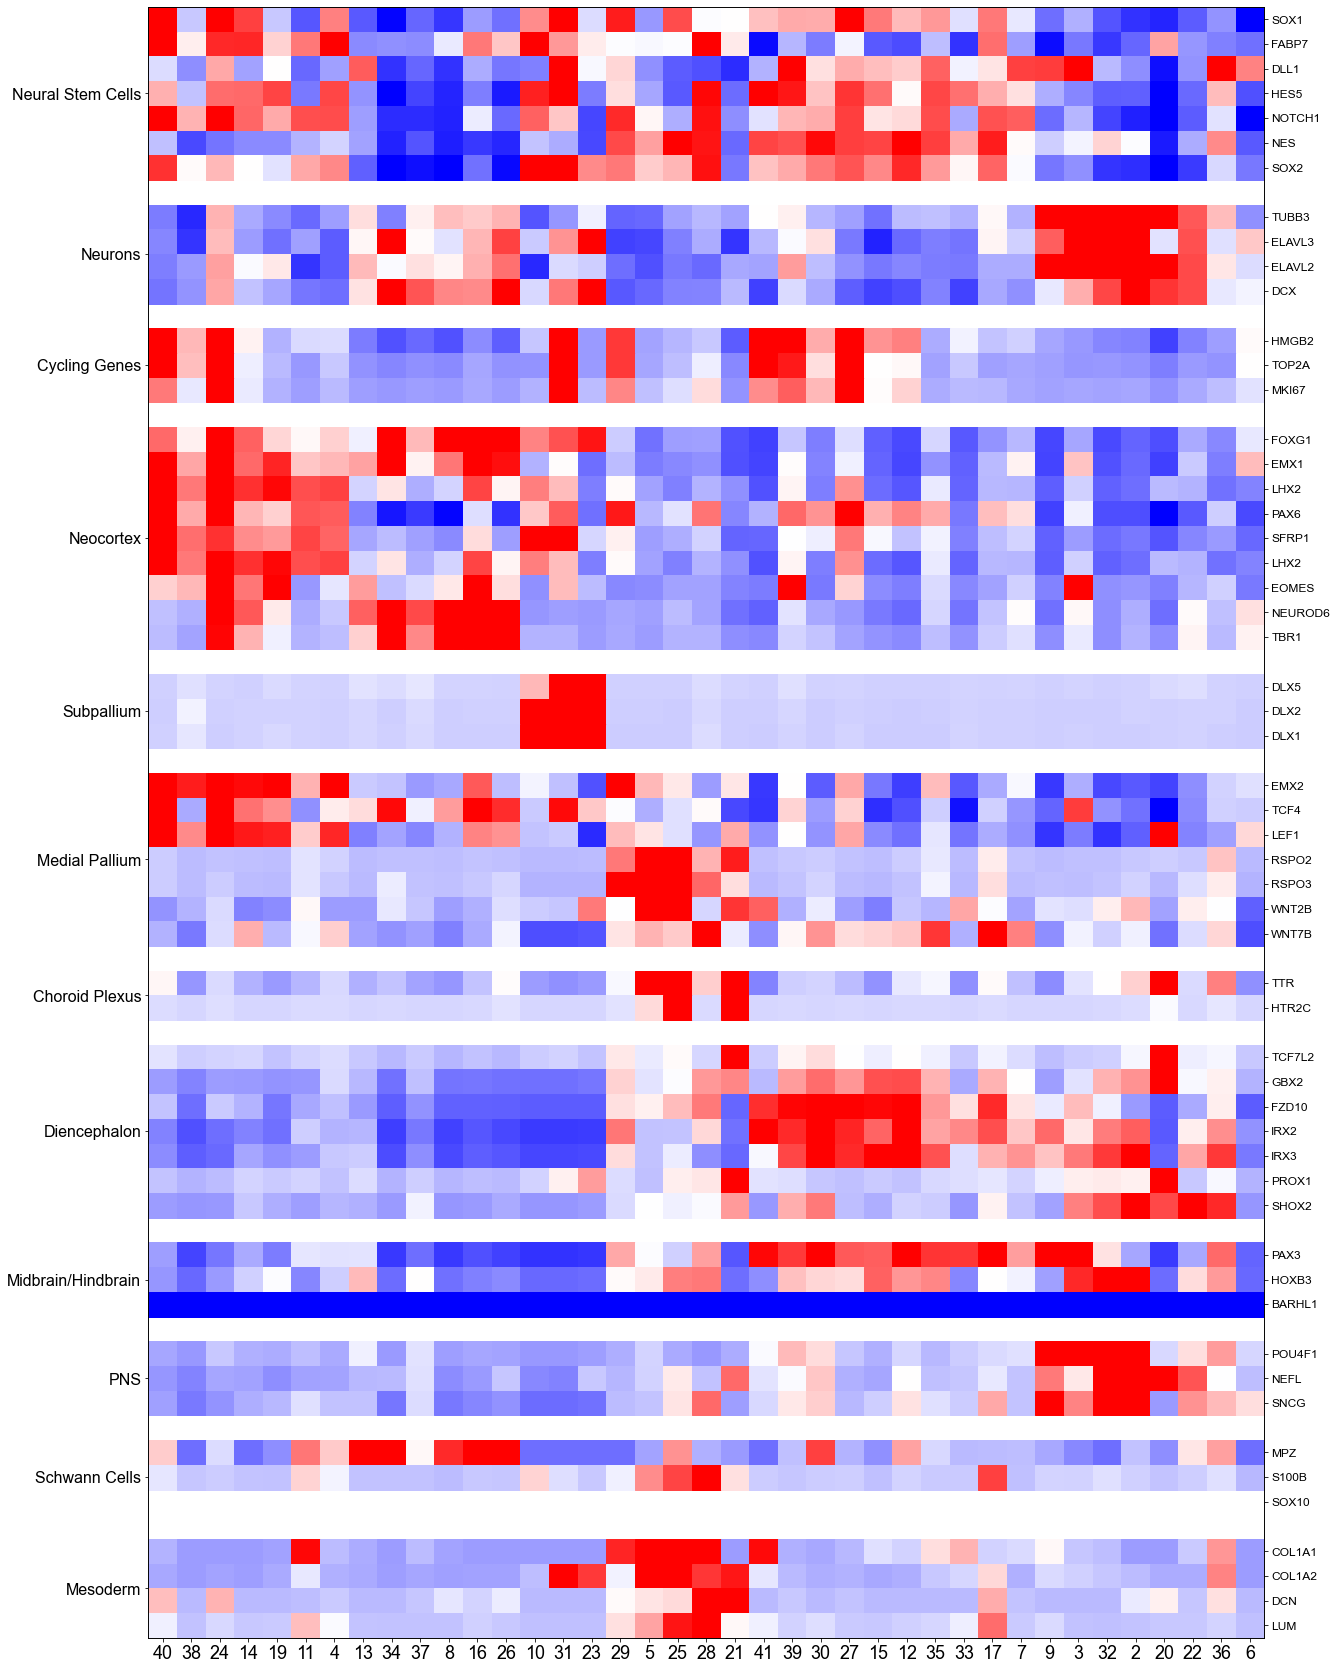

In [20]:
fig = plt.figure(figsize=(20,30))
ax = plt.subplot(111)
breaks=[]
fig = make_heatmap_zscore(fig,ax,tmp_reg_sub,adata,sorted_clusts_sub,
                   breaks=breaks,labs = [str(x) for x in sorted_clusts_sub])
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/heatmap_krieg.reg_sorted.png',dpi=150)

In [21]:
cell_lines = {'1323_4', 'H28126', 'YH10', 'H1'}

for line in set(adata.obs['Line']):
    for protocol in set(adata.obs['Protocol']):
        print(line, protocol)
        print('-----------')
        for reg in set(adata.obs['region']):
            if reg != 'Cortical': continue
            if len(adata.obs[(adata.obs['Line']==line) & (adata.obs['Protocol']==protocol)]) == 0:
                print(reg,0,0)
            else:
                print(reg,len(adata.obs[(adata.obs['Line']==line) & (adata.obs['Protocol']==protocol) & (adata.obs['region']==reg)]),
                    len(adata.obs[(adata.obs['Line']==line) & (adata.obs['Protocol']==protocol) & (adata.obs['region']==reg)])/len(adata.obs[(adata.obs['Line']==line) & (adata.obs['Protocol']==protocol)]))

for reg in set(adata.obs['region']):
    print(reg,len(adata.obs[(adata.obs['region']==reg) & (adata.obs['Age'].isin([10]))]))


YH10 Xiang
-----------
Cortical 0 0
YH10 Sasai
-----------
Cortical 1567 0.1512110392743414
YH10 Pasca
-----------
Cortical 3267 0.3928099074185403
H28126 Xiang
-----------
Cortical 6585 0.6514641867827463
H28126 Sasai
-----------
Cortical 5404 0.1795169916619606
H28126 Pasca
-----------
Cortical 214 0.04363784665579119
H1 Xiang
-----------
Cortical 240 0.029193528767789807
H1 Sasai
-----------
Cortical 21601 0.844646907014937
H1 Pasca
-----------
Cortical 0 0
1323_4 Xiang
-----------
Cortical 0 0
1323_4 Sasai
-----------
Cortical 4640 0.3945242751466712
1323_4 Pasca
-----------
Cortical 13781 0.8022937649182046
Non-neural 27
Posterior 34188
Hippocampal 2490
Subpallium 4850
Cortical 35800
Unknown 262


In [22]:
primary_clust_profiles = {}
for clust in primary_clust_order_sub:
    primary_clust_profiles[clust] = np.mean(adata_merge.X[adata_merge.obs['Cluster']==clust],axis=0)

adata_merge.obs['louvain'] = adata_merge.obs['louvain'].astype('float')
org_clust_profiles = {}
for clust in set(adata_org.obs['louvain']):
    org_clust_profiles[clust] = np.mean(adata_merge.X[adata_merge.obs['louvain']==clust],axis=0)

org_clusts = [12,27,15,4,0,19,29,43,7,26,37,2,39,14,16,21,28,5,11,25,36,1,6,8,
9,18,20,22,30,32,38,42,23,41,34,35,10,17,44,33,3,13,24,31]
reg_orders = ['Hippocampal','Choroid Plexus','Posterior','PNS','Schwann','Retinal','Epithelial','Mesoderm','Unknown']
for reg in reg_orders:
    reg_clusts = [x for x in list(set(adata_org.obs['louvain']) - set(org_clusts)) if reg in cell_type_dict[x]]
    for clust in reg_clusts:
        if 'Dividing' in cell_type_dict[clust]:
            org_clusts.append(int(clust))
    for clust in reg_clusts:
        if 'NSC' in cell_type_dict[clust] and clust not in org_clusts:
            org_clusts.append(int(clust))
    for clust in reg_clusts:
        if clust not in org_clusts:
            org_clusts.append(int(clust))

corrs = []
for j,clust in enumerate(org_clusts):#clust_dict:#[clust_dict_r[x] for x in [1,2,3,4,5]]:
    for k,clust_p in enumerate(primary_clust_order_sub):
        corrs.append(np.corrcoef(primary_clust_profiles[clust_p],org_clust_profiles[clust])[0][1])

min_corr = min([x for x in corrs if x != -2])
max_corr = max(corrs)
print(min_corr,max_corr)

-0.512616382569591 0.8103315398417341


In [33]:
cell_type_class_color_dict = {}
cell_type_class_color_dict['Cortical'] = 'royalblue'
cell_type_class_color_dict['Subpallium'] = 'cyan'
cell_type_class_color_dict['Hippocampal'] = 'indianred'
cell_type_class_color_dict['Medial Pallium'] = 'indianred'
cell_type_class_color_dict['Posterior'] = 'limegreen'
cell_type_class_color_dict['Unknown'] = 'gray'
cell_type_class_color_dict['Non-neural'] = 'orchid'
cell_type_class_color_dict['Retinal'] = 'gold'

color_dict = {}
color_dict['Astrocyte'] = (139./255,1./255,0./255)
color_dict['Newborn Low-Quality'] = 'darkgrey'#(241./255.,239./255,240./255)
color_dict['Pan-neuronal'] = (99./255,183./255,255./255)
color_dict['Upper Layer'] = (97./255,121./255,255./255)
color_dict['SST-MGE1'] = (198./255,224./255,254./255)
color_dict['Hindbrain RG'] = (251./255,213./255,0./255)
color_dict['V1 Neurons'] = (184./255,229./255,239./255)
color_dict['oRG'] = (208./255,63./255,103./255)
color_dict['Endothelial'] = (46./255,138./255,86./255)
color_dict['Pan-radial glia'] = (204./255,104./255,135./255)
color_dict['Layer VI Occipital'] = (0./255,152./255,254./255)
color_dict['Unknown'] = (211./255,211./255,211./255)
color_dict['Mixed'] = (217./255,113./255,215./255)
color_dict['Microglia'] = (244./255,164./255,96./255)
color_dict['Outlier'] = 'darkgrey'#(211./255,211./255,211./255)
color_dict['Glycolytic RG'] = (242./255,233./255,133./255)
color_dict['Low quality'] = (241./255.,239./255,240./255)

cell_type_class_dict = {}
for cell_type in set(adata_merged.obs['cell_type']):
    if 'Cortical' in cell_type: cell_type_class_dict[cell_type]='Cortical'
    elif 'PNS' in cell_type or 'Posterior' in cell_type or 'Schwann' in cell_type: cell_type_class_dict[cell_type]='Posterior'
    elif 'Hippocampal' in cell_type or 'Choroid' in cell_type or 'Cajal' in cell_type: cell_type_class_dict[cell_type]='Medial Pallium'
    elif 'Retinal' in cell_type in cell_type: cell_type_class_dict[cell_type]='Retinal'
    elif 'Unknown' in cell_type in cell_type: cell_type_class_dict[cell_type]='Unknown'
    elif cell_type !='doublet': cell_type_class_dict[cell_type]='Non-neural'

cell_type_class_dict['doublet']='doublet'

adata_merged.obs['cell_type_class'] = [cell_type_class_dict[x] for x in adata_merged.obs['cell_type']]
adata_org.obs['cell_type_class'] = [cell_type_class_dict[x] for x in adata_org.obs['cell_type']]

In [34]:
set(adata.obs['Subtype'])

{'Astrocyte',
 'Endothelial',
 'Glycolytic RG',
 'Hindbrain RG',
 'Layer VI Occipital',
 'Low quality',
 'Microglia',
 'Mixed',
 'Newborn Low-Quality',
 'Outlier',
 'Pan-neuronal',
 'Pan-radial glia',
 'SST-MGE1',
 'Unknown',
 'Upper Layer',
 'V1 Neurons',
 'oRG'}

In [35]:
for j,clust in enumerate(sorted_clusts_sub):
    print(clust_dict_ref[clust])

Pan-radial glia
Pan-radial glia
Pan-radial glia
Pan-radial glia
Low quality
Pan-radial glia
oRG
Low quality
Pan-neuronal
Pan-neuronal
Layer VI Occipital
Layer VI Occipital
Pan-neuronal
Pan-radial glia
SST-MGE1
SST-MGE1
Pan-radial glia
Hindbrain RG
Endothelial
Astrocyte
Endothelial
Pan-radial glia
Pan-radial glia
Pan-radial glia
Pan-radial glia
Pan-radial glia
Unknown
Hindbrain RG
Unknown
Pan-radial glia
Glycolytic RG
Unknown
Newborn Low-Quality
Upper Layer
Pan-neuronal
V1 Neurons
Pan-neuronal
Mixed
Pan-neuronal


/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


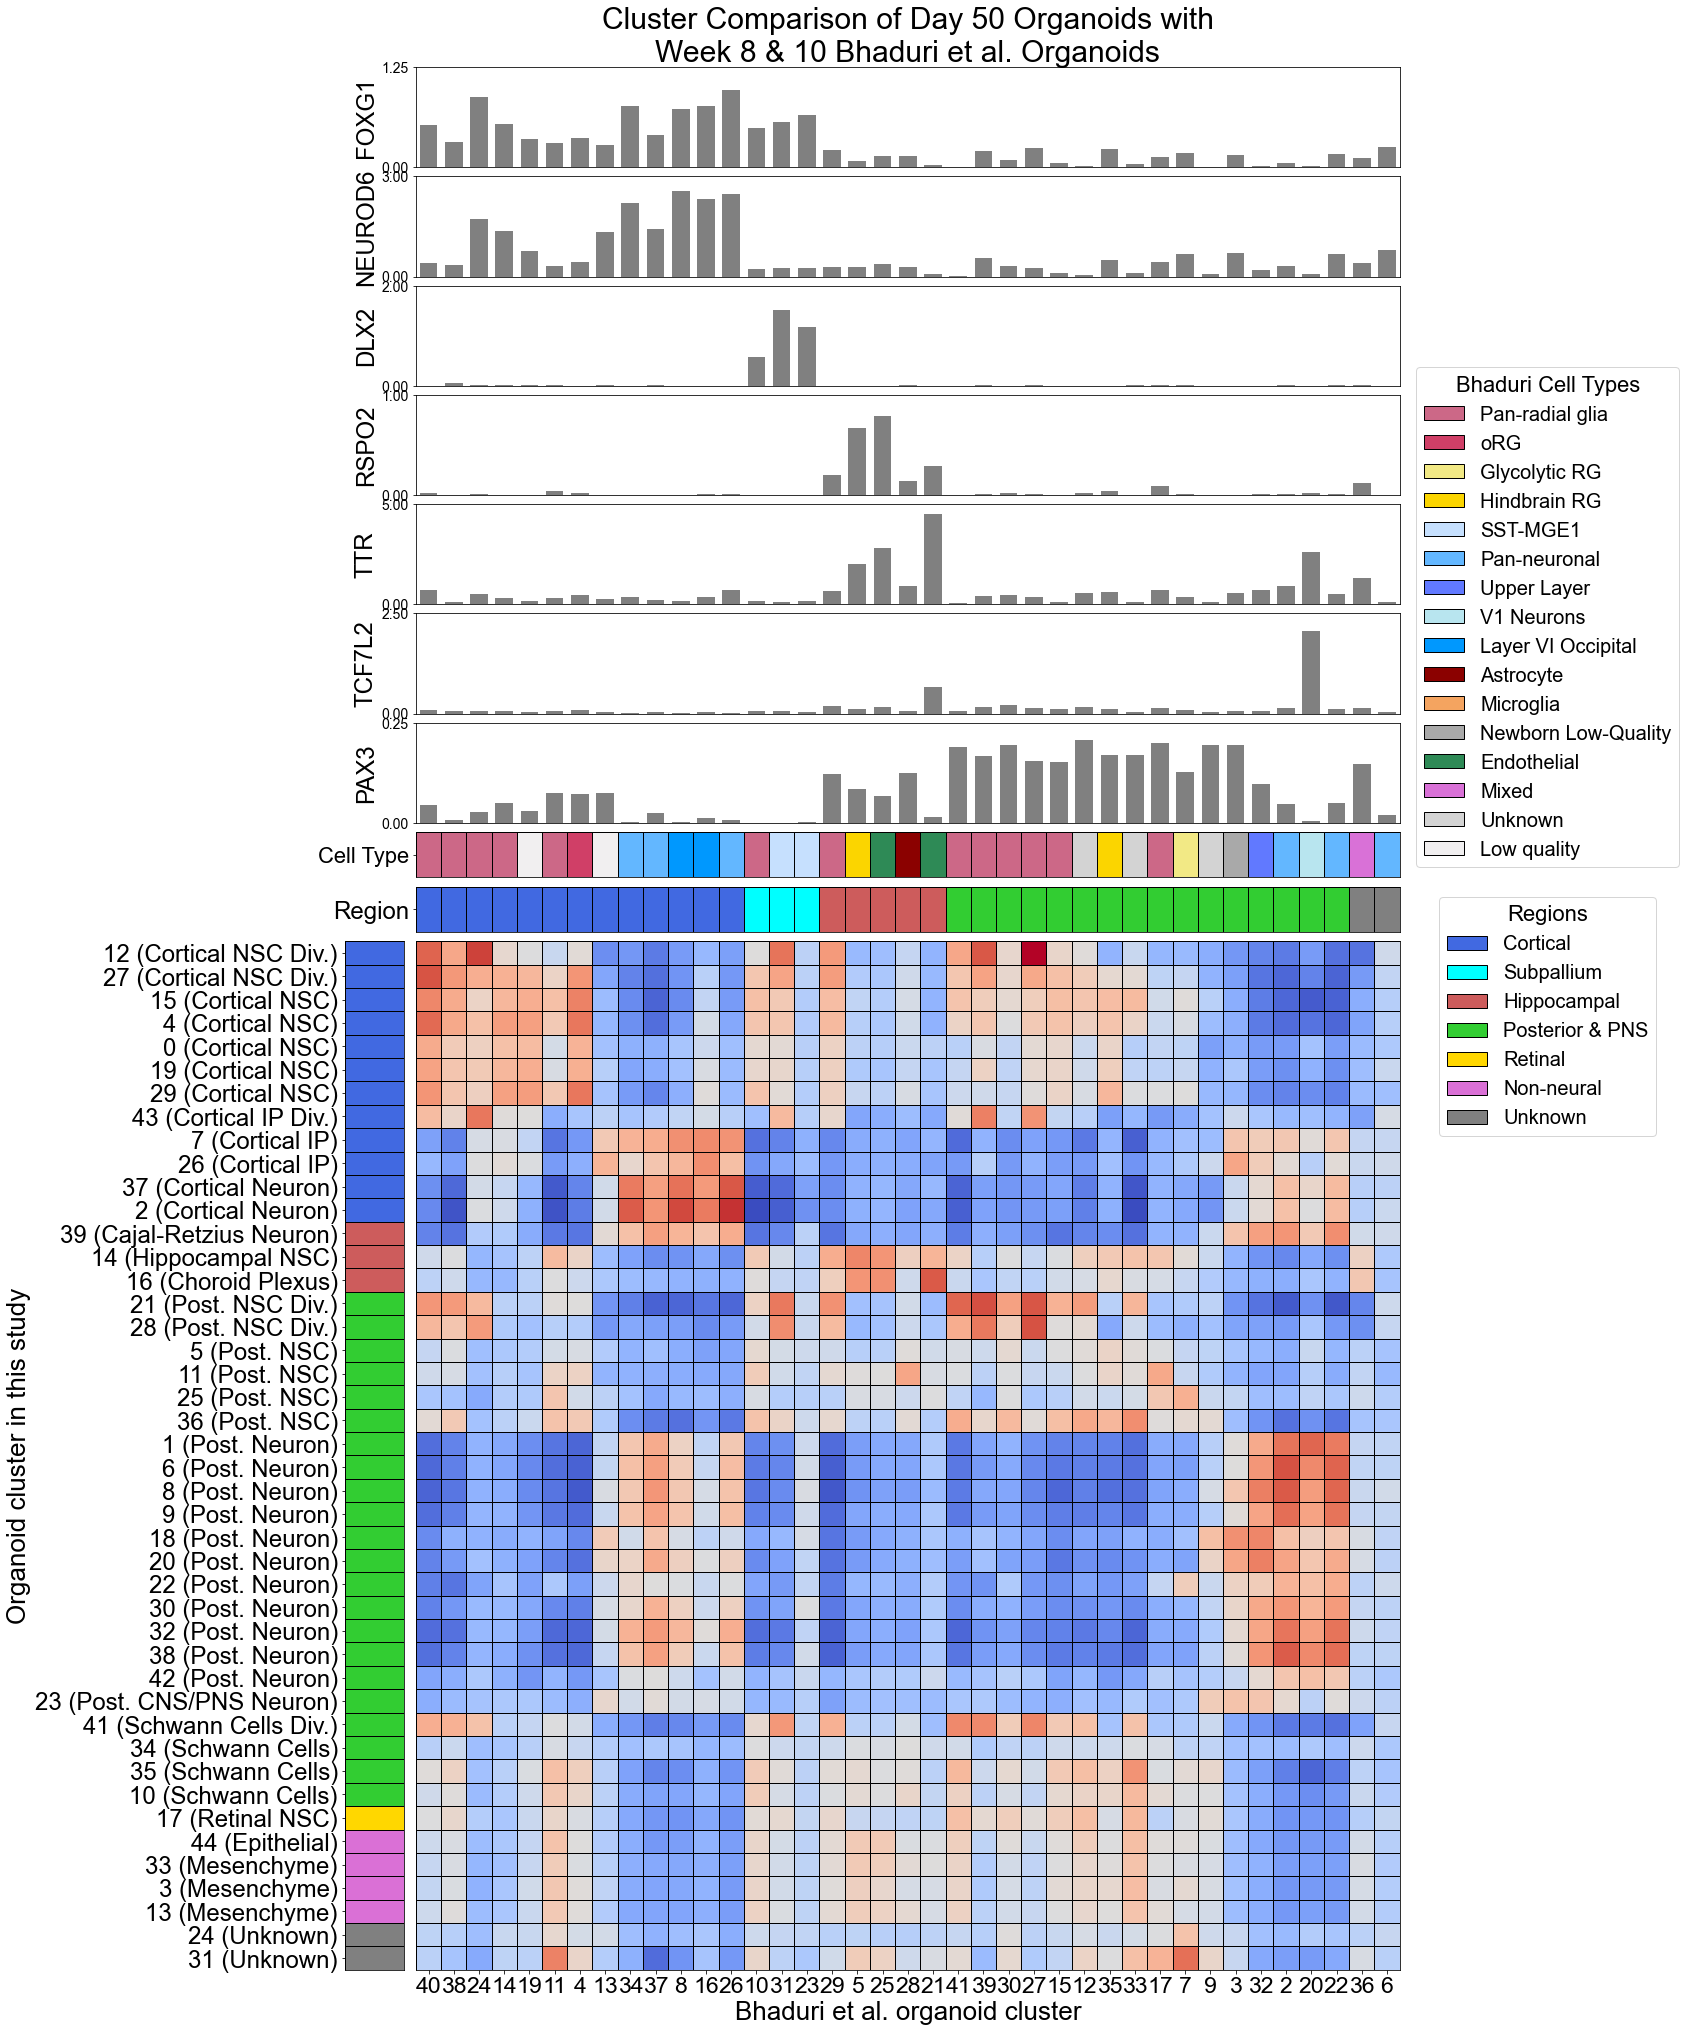

In [37]:
colormap = cm.coolwarm
normed_cmap = Normalize(vmin=min_corr, vmax=max_corr)
fig = plt.figure(figsize=(24,35))
ax = plt.subplot(111)
gs = gridspec.GridSpec(35,19,wspace=0.2, hspace=0.2)
ax = plt.subplot(gs[16:35,1:15])

cell_type_dict = {}
for clust,cell_type in zip(adata_org.obs['louvain'],adata_org.obs['cell_type']):
    cell_type_dict[clust]=cell_type

for j,clust in enumerate(org_clusts):#clust_dict:#[clust_dict_r[x] for x in [1,2,3,4,5]]:
    for k,clust_p in enumerate(sorted_clusts_sub):
        corr_ = np.corrcoef(primary_clust_profiles[clust_p],org_clust_profiles[clust])[0][1]
        color = tuple(np.array(colormap(normed_cmap(corr_),bytes=True))/255.)
        if corr_ == -2:
            p = patches.Rectangle((k-1/2.,-j-1/2.), 1, 1, fill=True, 
                                  facecolor='white', linestyle='-',edgecolor='black')
        else:
            p = patches.Rectangle((k-1/2.,-j-1/2.), 1, 1, fill=True, 
                                  facecolor=color, linestyle='-',edgecolor='black')
        ax.add_patch(p)

plt.xlim(-0.5,k+0.5)
plt.ylim(-j-0.5,0.5)
plt.xticks(range(len(sorted_clusts_sub)),sorted_clusts_sub,fontsize=23)
plt.yticks([])
plt.tight_layout()
plt.xlabel('Bhaduri et al. organoid cluster',fontsize=26)

ax = plt.subplot(gs[16:35,:1])
clust_cell_type_dict = {}
for clust,cell_type in zip(adata_org.obs['louvain'],adata_org.obs['cell_type_class']):
    clust_cell_type_dict[int(clust)] = cell_type

for j,clust in enumerate(org_clusts):#clust_dict:#[clust_dict_r[x] for x in [1,2,3,4,5]]:
    p = patches.Rectangle((0,-j-1/2.), 1, 1, fill=True, 
                                  facecolor=cell_type_class_color_dict[clust_cell_type_dict[clust]], linestyle='-',edgecolor='black')
    ax.add_patch(p)

plt.xlim(0,1)
plt.ylim(-j-1/2.,1/2.)
plt.xticks([])
plt.yticks(range(0,-len(org_clusts),-1),[str(x) + ' ('+cell_type_dict[x].replace("Posterior","Post.").replace("Dividing","Div.")
                                         +')' for x in org_clusts],fontsize=24)
plt.ylabel('Organoid cluster in this study',fontsize=26)

ax = plt.subplot(gs[14:15,1:15])
for j,clust in enumerate(sorted_clusts_sub):
    p = patches.Rectangle((j-1/2.,0), 1, 1, fill=True, 
                                  facecolor=color_dict[clust_dict_ref[clust]], linestyle='-',edgecolor='black')
    ax.add_patch(p)

plt.xlim(-0.5,len(sorted_clusts_sub)-0.5)
plt.ylim(0,1)
plt.yticks([0.5],['Cell Type'],fontsize=22)
plt.xticks([])

ax = plt.subplot(gs[15:16,1:15])
for j,clust in enumerate(sorted_clusts_sub):
    p = patches.Rectangle((j-1/2.,0), 1, 1, fill=True, 
                                  facecolor=cell_type_class_color_dict[regional_dict[clust]], linestyle='-',edgecolor='black')
    ax.add_patch(p)

plt.xlim(-0.5,len(sorted_clusts_sub)-0.5)
plt.ylim(0,1)
plt.yticks([0.5],['Region'],fontsize=24)
plt.xticks([])

from matplotlib.ticker import FormatStrFormatter
gene_list = ['FOXG1','NEUROD6','DLX2','RSPO2','TTR','TCF7L2','PAX3']
prim_expr = {}
for k,gene in enumerate(gene_list):
    ax = plt.subplot(gs[2*k:2*k+2,1:15])
    if k == 0:
        plt.title('Cluster Comparison of Day 50 Organoids with\nWeek 8 & 10 Bhaduri et al. Organoids',fontsize=30)
    prim_expr[gene] = {}
    for k,clust_p in enumerate(sorted_clusts_sub):
        prim_expr[gene][clust_p] = np.mean(adata.raw_X[adata.obs['Cluster']==clust_p,list(adata.var.index).index(gene)])
    for j,clust in enumerate(sorted_clusts_sub):
        plt.bar(j,prim_expr[gene][clust],color='gray',width=0.7)
    plt.xlim(-0.5,len(sorted_clusts_sub)-0.5)
    plt.xticks([])
    plt.ylabel(gene,fontsize=24)
    plt.yticks([0,plt.yticks()[0][-1]],fontsize=14)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #print(plt.yticks()[0][-1])

ax = plt.subplot(gs[:15,15:])
for cell_type in ['Pan-radial glia','oRG','Glycolytic RG','Hindbrain RG','SST-MGE1','Pan-neuronal',
'Upper Layer','V1 Neurons','Layer VI Occipital','Astrocyte','Microglia','Newborn Low-Quality',
'Endothelial','Mixed','Unknown','Low quality']:
    plt.bar(-10,0,color=color_dict[cell_type],label=cell_type,linestyle='-',edgecolor='black')

plt.xlim(0,1)
plt.ylim(1,2)
plt.legend(loc='lower center',fontsize=20,title='Bhaduri Cell Types',title_fontsize=22)
plt.axis('off')


ax = plt.subplot(gs[15:,15:])
for cell_type in ['Cortical','Subpallium','Hippocampal','Posterior','Retinal','Non-neural','Unknown']:
    if cell_type == 'Posterior':
        plt.bar(-10,0,color=cell_type_class_color_dict[cell_type],label='Posterior & PNS',linestyle='-',edgecolor='black')
    else:
        plt.bar(-10,0,color=cell_type_class_color_dict[cell_type],label=cell_type,linestyle='-',edgecolor='black')

plt.xlim(0,1)
plt.ylim(1,2)
plt.legend(loc='upper center',fontsize=20,title='Regions',title_fontsize=22)
plt.axis('off')

plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/corr_heatmap.png',bbox_inches='tight',dpi=500)

In [44]:
adata_sub = adata[~adata.obs['Cluster'].isin([1,18])]

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


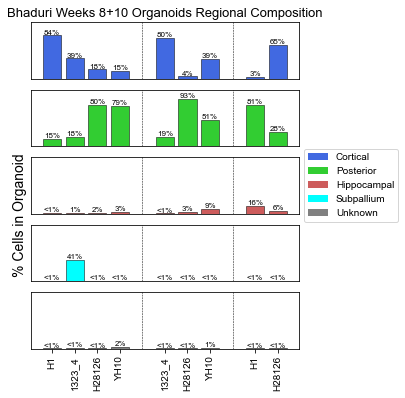

In [45]:
plt.figure(figsize=(8,6))
regs = ['Cortical','Posterior','Hippocampal','Subpallium','Unknown']
bottoms = {}
for kk,reg in enumerate(regs):
    xticks = []
    xtick_locs = []
    ax = plt.subplot(len(regs),1,kk+1)
    x_iter = 0
    if kk == 0:
        plt.title('Bhaduri Weeks 8+10 Organoids Regional Composition',fontsize=13)
    for j,tx in enumerate(['Sasai','Pasca','Xiang']):
        if tx == 'Sasai': txs = ['H1','1323_4','H28126','YH10']
        elif tx == 'Pasca': txs = ['1323_4','H28126','YH10']
        elif tx == 'Xiang': txs = ['H1','H28126']
        for k,line_iter in enumerate(txs):
            adata_merged_sub = adata_sub[adata_sub.obs['Line']==line_iter]
            len_tx = float(len(adata_merged_sub.obs[adata_merged_sub.obs['Protocol']==tx]))
            for clust in [reg]:#ordered_cell_type_class:
                perc_cells = len(adata_merged_sub.obs[(adata_merged_sub.obs['Protocol']==tx) & (adata_merged_sub.obs['region']==clust)])/len_tx
                plt.bar(x_iter+k,perc_cells,color=cell_type_class_color_dict[clust],edgecolor='black',linewidth=0.5)
                if perc_cells < 0.01:
                    perc_cells_annotate = '<1%'
                else:
                    perc_cells_annotate = str(round(perc_cells*100))+'%'
                plt.annotate(perc_cells_annotate,xy=(x_iter+k-len(perc_cells_annotate)*0.12,perc_cells+0.02),fontsize=8)
            xtick_locs.append(x_iter + k)
        x_iter += k+2
    if kk < len(regs)-1:
        plt.xticks([])
    else:
        plt.xticks(xtick_locs,['H1','1323_4','H28126','YH10',
        '1323_4','H28126','YH10','H1','H28126'],fontsize=10,rotation=90)
    plt.axvline(4,color='black',linestyle='--',linewidth=0.5)
    plt.axvline(8,color='black',linestyle='--',linewidth=0.5)
    plt.yticks([])
    if kk == 2:
        plt.ylabel('% Cells in Organoid               ',fontsize=14)
    plt.xlim(plt.xlim())
    plt.ylim(0,1.1)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    # Put a legend to the right of the current axis
    if kk == 2:
        for clust in regs:
            plt.bar(-100,0,color=cell_type_class_color_dict[clust],label=clust)
        # Shrink current axis by 20%
        plt.legend()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)

'''
for clust in ordered_cell_type_class[::-1]:
    plt.bar(-100,0,color=cell_type_class_color_dict[clust],label=clust)

# Shrink current axis by 20%
plt.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
'''

plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general.sep.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general.sep.pdf',bbox_inches='tight')

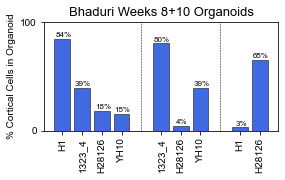

In [46]:
cort_percentage_dict = {}
plt.figure(figsize=(7,2))
regs = ['Cortical']
bottoms = {}
for kk,reg in enumerate(regs):
    xticks = []
    xtick_locs = []
    ax = plt.subplot(len(regs),1,kk+1)
    x_iter = 0
    if kk == 0:
        plt.title('Bhaduri Weeks 8+10 Organoids',fontsize=13)
    for j,tx in enumerate(['Sasai','Pasca','Xiang']):
        cort_percentage_dict[tx] = {}
        if tx == 'Sasai': txs = ['H1','1323_4','H28126','YH10']
        elif tx == 'Pasca': txs = ['1323_4','H28126','YH10']
        elif tx == 'Xiang': txs = ['H1','H28126']
        for k,line_iter in enumerate(txs):
            adata_merged_sub = adata_sub[adata_sub.obs['Line']==line_iter]
            len_tx = float(len(adata_merged_sub.obs[adata_merged_sub.obs['Protocol']==tx]))
            for clust in [reg]:#ordered_cell_type_class:
                perc_cells = len(adata_merged_sub.obs[(adata_merged_sub.obs['Protocol']==tx) & (adata_merged_sub.obs['region']==clust)])/len_tx
                cort_percentage_dict[tx][line_iter] = perc_cells
                plt.bar(x_iter+k,perc_cells,color=cell_type_class_color_dict[clust],edgecolor='black',linewidth=0.5)
                if perc_cells < 0.01:
                    perc_cells_annotate = '<1%'
                else:
                    perc_cells_annotate = str(round(perc_cells*100))+'%'
                plt.annotate(perc_cells_annotate,xy=(x_iter+k-len(perc_cells_annotate)*0.12,perc_cells+0.02),fontsize=8)
            xtick_locs.append(x_iter + k)
        x_iter += k+2
    plt.xticks(xtick_locs,['H1','1323_4','H28126','YH10','1323_4','H28126','YH10','H1','H28126'],fontsize=10,rotation=90)
    plt.axvline(4,color='black',linestyle='--',linewidth=0.5)
    plt.axvline(8,color='black',linestyle='--',linewidth=0.5)
    plt.yticks([])
    plt.ylabel('% Cortical Cells in Organoid',fontsize=10)
    plt.xlim(plt.xlim())
    plt.ylim(0,1)
    plt.yticks([0,1],[0,100])
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general.cortical.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general.cortical.pdf',bbox_inches='tight')

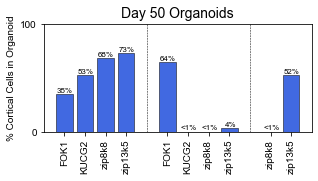

In [47]:
plt.figure(figsize=(8,2))
regs = ['Cortical']
bottoms = {}
for kk,reg in enumerate(regs):
    xticks = []
    xtick_locs = []
    ax = plt.subplot(len(regs),1,kk+1)
    x_iter = 0
    if kk == 0:
        plt.title('Day 50 Organoids',fontsize=14)
    for j,tx in enumerate(['sbnx','sbn','nt']):
        cort_percentage_dict[tx] = {}
        if tx == 'nt': txs = ['zip8k8','zip13k5']
        else: txs = ['FOK1','KUCG2','zip8k8','zip13k5']
        for k,line_iter in enumerate(txs):
            adata_merged_sub = adata_merged[adata_merged.obs['line']==line_iter]
            len_tx = float(len(adata_merged_sub.obs[adata_merged_sub.obs['tx']==tx]))
            for clust in [reg]:#ordered_cell_type_class:
                perc_cells = len(adata_merged_sub.obs[(adata_merged_sub.obs['tx']==tx) & (adata_merged_sub.obs['cell_type_class']==clust)])/len_tx
                cort_percentage_dict[tx][line_iter] = perc_cells
                plt.bar(x_iter+k,perc_cells,color=cell_type_class_color_dict[clust],edgecolor='black',linewidth=0.5)
                if perc_cells < 0.01:
                    perc_cells_annotate = '<1%'
                else:
                    perc_cells_annotate = str(round(perc_cells*100))+'%'
                plt.annotate(perc_cells_annotate,xy=(x_iter+k-len(perc_cells_annotate)*0.12,perc_cells+0.02),fontsize=8)
            xtick_locs.append(x_iter + k)
        x_iter += k+2
    plt.xticks(xtick_locs,['FOK1','KUCG2','zip8k8','zip13k5','FOK1','KUCG2','zip8k8','zip13k5','zip8k8','zip13k5',],fontsize=10,rotation=90)
    plt.axvline(4,color='black',linestyle='--',linewidth=0.5)
    plt.axvline(9,color='black',linestyle='--',linewidth=0.5)
    plt.yticks([])
    plt.ylabel('% Cortical Cells in Organoid',fontsize=10)
    plt.xlim(plt.xlim())
    plt.ylim(0,1)
    plt.yticks([0,1],[0,100])
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general_d50_orgs.cortical.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general_d50_orgs.cortical.pdf',bbox_inches='tight')

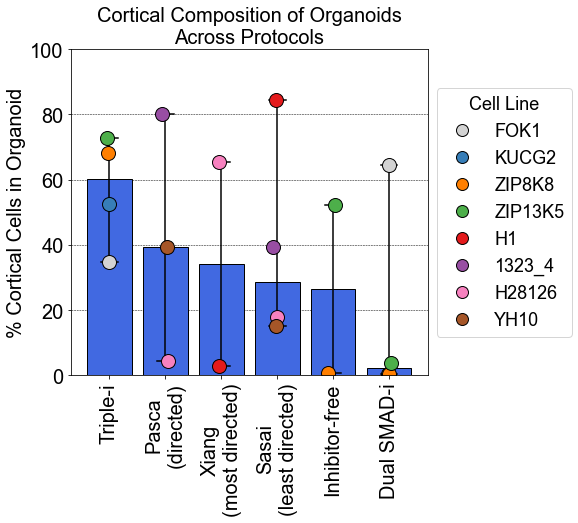

In [52]:
clrs = sns.color_palette('Set1', n_colors=10)  # a list of RGB tuples
tx_color_d = {'FOK1':'lightgray','KUCG2':clrs[1],'zip8k8':clrs[4],'zip13k5':clrs[2]}
tx_color_d['H1'] = clrs[0]
tx_color_d['1323_4'] = clrs[3]
tx_color_d['H28126'] = clrs[7]
tx_color_d['YH10'] = clrs[6]

tx_dict['Sasai']='Sasai\n(least directed)'
tx_dict['Pasca']='Pasca\n(directed)'
tx_dict['Xiang']='Xiang\n(most directed)'

plt.figure(figsize=(8,6))
ax = plt.subplot(111)
txs = []
for j,tx in enumerate(sorted(cort_percentage_dict.items(),key = lambda x:np.median(list(x[1].values())),reverse=True)):
    txs.append(tx[0])
    plt.bar(j,np.median(list(tx[1].values())),edgecolor='black',color=cell_type_class_color_dict['Cortical'],linewidth=1,zorder=-1)
    #CI plot
    plt.plot([j-0.15,j+0.15],[min(list(tx[1].values())),min(list(tx[1].values()))],color='black',zorder=1,linewidth=1.5)
    plt.plot([j-0.15,j+0.15],[max(list(tx[1].values())),max(list(tx[1].values()))],color='black',zorder=1,linewidth=1.5)
    plt.plot([j,j],[min(list(tx[1].values())),max(list(tx[1].values()))],color='black',zorder=1,linewidth=1.5)
    for line in tx[1]:
        plt.plot(j+np.random.normal(0,1)*0.05,tx[1][line],'o',markersize=14,markeredgecolor='k',markerfacecolor=tx_color_d[line])

for k in [0.2,0.4,0.6,0.8]:
    plt.axhline(k,linestyle='--',linewidth=0.5,color='black',zorder=-10)


plt.xticks(range(j+1),[tx_dict[x] for x in txs],rotation=90,fontsize=20)
plt.ylabel('% Cortical Cells in Organoid',fontsize=20)
plt.ylim(0,1)
plt.xlim(plt.xlim())
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,20,40,60,80,100],fontsize=20)
plt.title('Cortical Composition of Organoids\nAcross Protocols',fontsize=20)
for line in tx_color_d:
    plt.plot(-20,-20,'o',markersize=12,markeredgecolor='k',markerfacecolor=tx_color_d[line],label=line.upper())

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18,title='Cell Line',title_fontsize=18)
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/full_cort_comp.png',dpi=500,bbox_inches='tight')

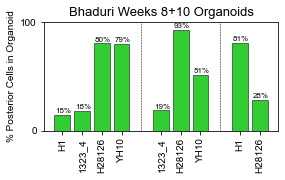

In [53]:
post_percentage_dict = {}
plt.figure(figsize=(7,2))
regs = ['Posterior']
bottoms = {}
for kk,reg in enumerate(regs):
    xticks = []
    xtick_locs = []
    ax = plt.subplot(len(regs),1,kk+1)
    x_iter = 0
    if kk == 0:
        plt.title('Bhaduri Weeks 8+10 Organoids',fontsize=13)
    for j,tx in enumerate(['Sasai','Pasca','Xiang']):
        post_percentage_dict[tx] = {}
        if tx == 'Sasai': txs = ['H1','1323_4','H28126','YH10']
        elif tx == 'Pasca': txs = ['1323_4','H28126','YH10']
        elif tx == 'Xiang': txs = ['H1','H28126']
        for k,line_iter in enumerate(txs):
            adata_merged_sub = adata_sub[adata_sub.obs['Line']==line_iter]
            len_tx = float(len(adata_merged_sub.obs[adata_merged_sub.obs['Protocol']==tx]))
            for clust in [reg]:#ordered_cell_type_class:
                perc_cells = len(adata_merged_sub.obs[(adata_merged_sub.obs['Protocol']==tx) & (adata_merged_sub.obs['region']==clust)])/len_tx
                post_percentage_dict[tx][line_iter] = perc_cells
                plt.bar(x_iter+k,perc_cells,color=cell_type_class_color_dict[clust],edgecolor='black',linewidth=0.5)
                if perc_cells < 0.01:
                    perc_cells_annotate = '<1%'
                else:
                    perc_cells_annotate = str(round(perc_cells*100))+'%'
                plt.annotate(perc_cells_annotate,xy=(x_iter+k-len(perc_cells_annotate)*0.12,perc_cells+0.02),fontsize=8)
            xtick_locs.append(x_iter + k)
        x_iter += k+2
    plt.xticks(xtick_locs,['H1','1323_4','H28126','YH10','1323_4','H28126','YH10','H1','H28126'],fontsize=10,rotation=90)
    plt.axvline(4,color='black',linestyle='--',linewidth=0.5)
    plt.axvline(8,color='black',linestyle='--',linewidth=0.5)
    plt.yticks([])
    plt.ylabel('% Posterior Cells in Organoid',fontsize=10)
    plt.xlim(plt.xlim())
    plt.ylim(0,1)
    plt.yticks([0,1],[0,100])
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general.posterior.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general.posterior.pdf',bbox_inches='tight')

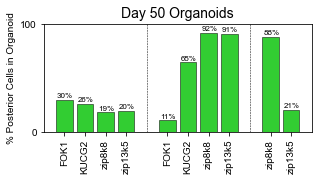

In [54]:
plt.figure(figsize=(8,2))
regs = ['Posterior']
bottoms = {}
for kk,reg in enumerate(regs):
    xticks = []
    xtick_locs = []
    ax = plt.subplot(len(regs),1,kk+1)
    x_iter = 0
    if kk == 0:
        plt.title('Day 50 Organoids',fontsize=14)
    for j,tx in enumerate(['sbnx','sbn','nt']):
        post_percentage_dict[tx] = {}
        if tx == 'nt': txs = ['zip8k8','zip13k5']
        else: txs = ['FOK1','KUCG2','zip8k8','zip13k5']
        for k,line_iter in enumerate(txs):
            adata_merged_sub = adata_merged[adata_merged.obs['line']==line_iter]
            len_tx = float(len(adata_merged_sub.obs[adata_merged_sub.obs['tx']==tx]))
            for clust in [reg]:#ordered_cell_type_class:
                perc_cells = len(adata_merged_sub.obs[(adata_merged_sub.obs['tx']==tx) & (adata_merged_sub.obs['cell_type_class']==clust)])/len_tx
                post_percentage_dict[tx][line_iter] = perc_cells
                plt.bar(x_iter+k,perc_cells,color=cell_type_class_color_dict[clust],edgecolor='black',linewidth=0.5)
                if perc_cells < 0.01:
                    perc_cells_annotate = '<1%'
                else:
                    perc_cells_annotate = str(round(perc_cells*100))+'%'
                plt.annotate(perc_cells_annotate,xy=(x_iter+k-len(perc_cells_annotate)*0.12,perc_cells+0.02),fontsize=8)
            xtick_locs.append(x_iter + k)
        x_iter += k+2
    plt.xticks(xtick_locs,['FOK1','KUCG2','zip8k8','zip13k5','FOK1','KUCG2','zip8k8','zip13k5','zip8k8','zip13k5',],fontsize=10,rotation=90)
    plt.axvline(4,color='black',linestyle='--',linewidth=0.5)
    plt.axvline(9,color='black',linestyle='--',linewidth=0.5)
    plt.yticks([])
    plt.ylabel('% Posterior Cells in Organoid',fontsize=10)
    plt.xlim(plt.xlim())
    plt.ylim(0,1)
    plt.yticks([0,1],[0,100])
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general_d50_orgs.posterior.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/perc_cell_types_general_d50_orgs.posterior.pdf',bbox_inches='tight')

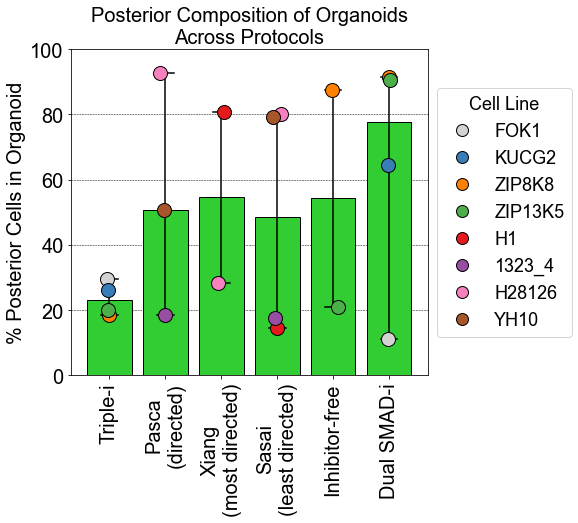

In [56]:
clrs = sns.color_palette('Set1', n_colors=10)  # a list of RGB tuples
tx_color_d = {'FOK1':'lightgray','KUCG2':clrs[1],'zip8k8':clrs[4],'zip13k5':clrs[2]}
tx_color_d['H1'] = clrs[0]
tx_color_d['1323_4'] = clrs[3]
tx_color_d['H28126'] = clrs[7]
tx_color_d['YH10'] = clrs[6]

tx_dict['Sasai']='Sasai\n(least directed)'
tx_dict['Pasca']='Pasca\n(directed)'
tx_dict['Xiang']='Xiang\n(most directed)'

plt.figure(figsize=(8,6))
ax = plt.subplot(111)
txs = []
for j,tx in enumerate(sorted(cort_percentage_dict.items(),key = lambda x:np.median(list(x[1].values())),reverse=True)):
    txs.append(tx[0])
    plt.bar(j,np.median(list(post_percentage_dict[tx[0]].values())),edgecolor='black',color=cell_type_class_color_dict['Posterior'],linewidth=1,zorder=-1)
    #CI plot
    plt.plot([j-0.15,j+0.15],[min(post_percentage_dict[tx[0]].values()),min(post_percentage_dict[tx[0]].values())],color='black',zorder=1,linewidth=1.5)
    plt.plot([j-0.15,j+0.15],[max(post_percentage_dict[tx[0]].values()),max(post_percentage_dict[tx[0]].values())],color='black',zorder=1,linewidth=1.5)
    plt.plot([j,j],[min(post_percentage_dict[tx[0]].values()),max(post_percentage_dict[tx[0]].values())],color='black',zorder=1,linewidth=1.5)
    for line in post_percentage_dict[tx[0]].keys():
        plt.plot(j+np.random.normal(0,1)*0.05,post_percentage_dict[tx[0]][line],'o',markersize=14,markeredgecolor='k',markerfacecolor=tx_color_d[line])

for k in [0.2,0.4,0.6,0.8]:
    plt.axhline(k,linestyle='--',linewidth=0.5,color='black',zorder=-10)


plt.xticks(range(j+1),[tx_dict[x] for x in txs],rotation=90,fontsize=20)
plt.ylabel('% Posterior Cells in Organoid',fontsize=20)
plt.ylim(0,1)
plt.xlim(plt.xlim())
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,20,40,60,80,100],fontsize=20)
plt.title('Posterior Composition of Organoids\nAcross Protocols',fontsize=20)
for line in tx_color_d:
    plt.plot(-20,-20,'o',markersize=12,markeredgecolor='k',markerfacecolor=tx_color_d[line],label=line.upper())

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18,title='Cell Line',title_fontsize=18)
plt.savefig('figures/merged_kriegstein_organoids_weeks8_10/full_post_comp.posterior.png',dpi=500,bbox_inches='tight')